In [76]:
import pyspark as ps
spark =ps.sql.SparkSession.builder.master('local[2]').appName('HW3').getOrCreate()

In [77]:
sc = spark.sparkContext

In [78]:
import random
n=100
dice1=(sc.parallelize(range(n)).map(lambda _:random.randint(1,6)))
dice1_outcome=dice1.collect()

In [79]:
dice2=(sc.parallelize(range(n)).map(lambda _:random.randint(1,6)))
dice2_outcome=dice2.collect()

In [80]:
sum_roll=[]
for i in range(n):
    sum_roll.append(dice1_outcome[i]+dice2_outcome[i])

In [81]:
import pandas as pd
data=[dice1_outcome,dice2_outcome,sum_roll]

In [82]:
df=pd.DataFrame(data)
df=df.T
df.rename(columns={0:"Dice 1",1:"Dice 2", 2:"Outcome"}, inplace=True)
df

,Dice 1,Dice 2,Outcome
0,1,2,3
1,5,1,6
2,6,1,7
3,1,1,2
4,1,5,6
...,...,...,...
95,3,3,6
96,2,5,7
97,1,1,2
98,6,5,11


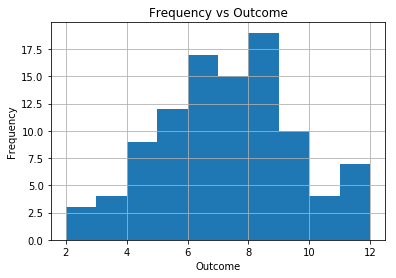

In [83]:
import matplotlib.pyplot as plt
ax=df.hist(['Outcome'])
ax=ax[0]

for x in ax:
    x.set_xlabel("Outcome")
    x.set_ylabel("Frequency")
    x.set_title("Frequency vs Outcome")
        